<a href="https://colab.research.google.com/github/ichi-a00/google_colab/blob/main/ikawidget2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

スプラトゥーン２の戦績データから主成分分析を行います。
参照：https://ossyaritoori.hatenablog.com/entry/2020/04/30/%E2%91%A0_ikawidget2%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6Splatoon2%E3%81%A7%E3%81%AE%E7%B7%A8%E6%88%90%E3%82%92%E8%A9%95%E4%BE%A1_%EF%BD%9E%EF%BC%91%EF%BC%8E

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
csv = pd.read_csv("/content/ikaWidgetCSV_20211227140557_.csv")

In [22]:
len(csv.keys()), len(csv["no"])

(640, 151)

In [23]:
csv.tail()

,no,startTime,elapsedTime,win,udemae,udemaeName,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,stageName,gameKey,gameMode,gameModeKey,gameRule,gameRuleKey,gameType,fesID,fesMyTheme,fesMyThemeKey,fesOtherTheme,fesOtherThemeKey,fesMyColorR,...,bravo4HeadSub1SkillName,bravo4HeadSub2SkillID,bravo4HeadSub2SkillName,bravo4HeadSub3SkillID,bravo4HeadSub3SkillName,bravo4ClothesID,bravo4ClothesName,bravo4ClothesRarity,bravo4ClothesKind,bravo4ClothesBrandID,bravo4ClothesBrandName,bravo4ClothesBrandFrequentSkillID,bravo4ClothesBrandFrequentSkillName,bravo4ClothesSkillID,bravo4ClothesSkillName,bravo4ClothesSub1SkillID,bravo4ClothesSub1SkillName,bravo4ClothesSub2SkillID,bravo4ClothesSub2SkillName,bravo4ClothesSub3SkillID,bravo4ClothesSub3SkillName,bravo4ShoesID,bravo4ShoesName,bravo4ShoesRarity,bravo4ShoesKind,bravo4ShoesBrandID,bravo4ShoesBrandName,bravo4ShoesBrandFrequentSkillID,bravo4ShoesBrandFrequentSkillName,bravo4ShoesSkillID,bravo4ShoesSkillName,bravo4ShoesSub1SkillID,bravo4ShoesSub1SkillName,bravo4ShoesSub2SkillID,bravo4ShoesSub2SkillName,bravo4ShoesSub3SkillID,bravo4ShoesSub3SkillName,Unnamed: 637,Unnamed: 638,Unnamed: 639
146,6077,2021/12/22 21:23:22,217,1,7,A,0,0,0,0,0,100,0,0,410167,0,0,0,0,1600,0,0,0,0,0,0,7,ホッケふ頭,splat_zonesgachi,ガチマッチ,gachi,ガチエリア,splat_zones,gachi,0,,,,,0.0,...,メイン性能アップ,201.0,メイン性能アップ,201,メイン性能アップ,9002.0,アーバンベスト ナイト,2.0,clothes,6.0,ホッコリー,1.0,インク効率アップ(サブ),201.0,メイン性能アップ,201.0,メイン性能アップ,201,メイン性能アップ,201,メイン性能アップ,6016.0,アナアキスパイダー6ホール,2.0,shoes,15.0,アナアキ,201.0,メイン性能アップ,4.0,イカダッシュ速度アップ,4.0,イカダッシュ速度アップ,4.0,イカダッシュ速度アップ,4,イカダッシュ速度アップ,NaN,NaN,NaN
147,6076,2021/12/22 21:17:22,300,1,7,A,0,0,0,0,0,82,73,0,408883,0,0,0,0,1550,0,0,0,0,0,0,7,ホッケふ頭,splat_zonesgachi,ガチマッチ,gachi,ガチエリア,splat_zones,gachi,0,,,,,0.0,...,イカダッシュ速度アップ,0.0,インク効率アップ(メイン),3,ヒト移動速度アップ,1039.0,バンドT SQUIDSQUAD,0.0,clothes,3.0,ロッケンベルグ,3.0,ヒト移動速度アップ,11.0,相手インク影響軽減,5.0,スペシャル増加量アップ,3,ヒト移動速度アップ,3,ヒト移動速度アップ,27104.0,タコゾネスブーツネオ,1.0,shoes,98.0,アタリメイド,0.0,,110.0,対物攻撃力アップ,3.0,ヒト移動速度アップ,3.0,ヒト移動速度アップ,3,ヒト移動速度アップ,NaN,NaN,NaN
148,6075,2021/12/22 21:13:22,171,1,7,A,0,0,0,0,0,100,0,0,407212,0,0,0,0,1570,0,0,0,0,0,0,7,ホッケふ頭,splat_zonesgachi,ガチマッチ,gachi,ガチエリア,splat_zones,gachi,0,,,,,0.0,...,インク効率アップ(サブ),5.0,スペシャル増加量アップ,1,インク効率アップ(サブ),7007.0,ドロップスウェット ネガ,2.0,clothes,17.0,タタキケンサキ,201.0,メイン性能アップ,4.0,イカダッシュ速度アップ,200.0,爆風ダメージ軽減・改,201,メイン性能アップ,201,メイン性能アップ,23007.0,ミッドナイトスリッポン,2.0,shoes,2.0,クラーゲス,4.0,イカダッシュ速度アップ,110.0,対物攻撃力アップ,4.0,イカダッシュ速度アップ,11.0,相手インク影響軽減,11,相手インク影響軽減,NaN,NaN,NaN
149,6074,2021/12/22 21:06:22,300,1,7,A,0,0,0,0,0,86,65,0,1723474,0,0,0,0,1560,0,0,0,0,0,0,14,ハコフグ倉庫,splat_zonesgachi,ガチマッチ,gachi,ガチエリア,splat_zones,gachi,0,,,,,0.0,...,インク効率アップ(サブ),5.0,スペシャル増加量アップ,0,インク効率アップ(メイン),5042.0,クンフージャージ,2.0,clothes,17.0,タタキケンサキ,201.0,メイン性能アップ,104.0,イカニンジャ,4.0,イカダッシュ速度アップ,4,イカダッシュ速度アップ,11,相手インク影響軽減,23007.0,ミッドナイトスリッポン,2.0,shoes,2.0,クラーゲス,4.0,イカダッシュ速度アップ,110.0,対物攻撃力アップ,1.0,インク効率アップ(サブ),201.0,メイン性能アップ,2,インク回復力アップ,NaN,NaN,NaN
150,6073,2021/12/22 21:01:22,236,1,7,A,0,0,0,0,0,100,0,0,1722152,0,0,0,0,1500,0,0,0,0,0,0,14,ハコフグ倉庫,splat_zonesgachi,ガチマッチ,gachi,ガチエリア,splat_zones,gachi,0,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
csv.count()

no                          151
startTime                   151
elapsedTime                 151
win                         151
udemae                      151
                           ... 
bravo4ShoesSub3SkillID      150
bravo4ShoesSub3SkillName    150
Unnamed: 637                  0
Unnamed: 638                  0
Unnamed: 639                  0
Length: 640, dtype: int64

In [10]:
csv.dtypes

no                            int64
startTime                    object
elapsedTime                   int64
win                           int64
udemae                        int64
                             ...   
bravo4ShoesSub3SkillID       object
bravo4ShoesSub3SkillName     object
Unnamed: 637                float64
Unnamed: 638                float64
Unnamed: 639                float64
Length: 640, dtype: object

In [12]:
csv.isnull().sum()

no                            0
startTime                     0
elapsedTime                   0
win                           0
udemae                        0
                           ... 
bravo4ShoesSub3SkillID        1
bravo4ShoesSub3SkillName      1
Unnamed: 637                151
Unnamed: 638                151
Unnamed: 639                151
Length: 640, dtype: int64

In [37]:
data13 = csv.select_dtypes(["int64", "float64"])
data13.head(5)

,no,elapsedTime,win,udemae,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,fesID,fesMyColorR,fesMyColorG,fesMyColorB,fesOtherColorR,fesOtherColorG,fesOtherColorB,playerRank,playerUdemae,playerSPlusNumber,playerUdemaeIsX,playerUdemaeIsReached,playerIsCrown,playerStarRank,playerKill,...,bravo4SPlusNumber,bravo4UdemaeIsX,bravo4UdemaeIsReached,bravo4IsCrown,bravo4StarRank,bravo4Kill,bravo4Death,bravo4Assist,bravo4Special,bravo4Ratio,bravo4AllKill,bravo4SortScore,bravo4PaintPoint,bravo4FesGrade,bravo4WeaponID,bravo4WeaponSpecialID,bravo4WeaponSubID,bravo4HeadID,bravo4HeadRarity,bravo4HeadBrandID,bravo4HeadBrandFrequentSkillID,bravo4HeadSkillID,bravo4HeadSub1SkillID,bravo4HeadSub2SkillID,bravo4ClothesID,bravo4ClothesRarity,bravo4ClothesBrandID,bravo4ClothesBrandFrequentSkillID,bravo4ClothesSkillID,bravo4ClothesSub1SkillID,bravo4ShoesID,bravo4ShoesRarity,bravo4ShoesBrandID,bravo4ShoesBrandFrequentSkillID,bravo4ShoesSkillID,bravo4ShoesSub1SkillID,bravo4ShoesSub2SkillID,Unnamed: 637,Unnamed: 638,Unnamed: 639
0,6295,300,0,7,0,0,0,0,0,47,76,0,21912,0,0,0,0,1530,0,0,0,0,0,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,9.0,8.0,1.0,2.0,1125.0,10.0,3.0,1214.0,0.0,21.0,3.0,2.0,2010.0,0.0,9.0,200.0,201.0,200.0,200.0,10009.0,1.0,4.0,6.0,4.0,4.0,2031.0,0.0,10.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN
1,6294,300,1,7,0,0,0,0,0,69,51,0,20667,0,0,0,0,1510,0,0,0,0,0,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,6.0,12.0,4.0,4.0,500.0,10.0,1.0,1231.0,0.0,61.0,0.0,4.0,5001.0,1.0,5.0,7.0,1.0,1.0,1.0,2008.0,0.0,0.0,11.0,2.0,2.0,8007.0,1.0,3.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN
2,6293,300,0,7,0,0,0,0,0,37,79,0,775,0,0,0,0,1620,0,0,0,0,0,0,16,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,6.0,6.0,2.0,1.0,1000.0,8.0,2.0,802.0,0.0,4012.0,17.0,8.0,3008.0,2.0,3.0,3.0,101.0,200.0,200.0,7009.0,2.0,17.0,201.0,4.0,201.0,1014.0,0.0,8.0,0.0,201.0,3.0,0.0,NaN,NaN,NaN
3,6292,300,1,7,0,0,0,0,0,73,12,0,3723,0,0,0,0,1550,0,0,0,0,0,0,16,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,1.0,5.0,12.0,4.0,1.0,416.0,9.0,3.0,768.0,0.0,72.0,17.0,0.0,5000.0,1.0,5.0,7.0,201.0,201.0,7.0,1035.0,1.0,0.0,11.0,0.0,0.0,2009.0,1.0,8.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN
4,6291,300,0,7,0,0,0,0,0,53,74,0,1780816,0,0,0,0,1530,0,0,0,0,0,0,16,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,9.0,4.0,3.0,4.0,2250.0,12.0,3.0,900.0,0.0,2001.0,11.0,4.0,1006.0,0.0,6.0,1.0,4.0,4.0,4.0,5001.0,2.0,11.0,5.0,4.0,4.0,7000.0,0.0,2.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


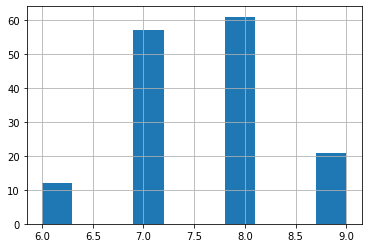

In [15]:
data13["udemae"].hist()

In [16]:
data13.groupby(['stageID']).mean()['win'].round(3)

stageID
0     0.625
1     0.533
2     0.636
3     0.450
5     0.250
6     0.500
7     0.667
8     0.333
13    0.600
14    0.750
15    0.667
16    0.625
17    0.500
21    0.636
22    0.286
Name: win, dtype: float64

In [20]:
csv.groupby(["stageName"]).mean()["win"].round(3)

stageName
 アロワナモール        0.667
 アンチョビットゲームズ    0.636
 ガンガゼ野外音楽堂      0.636
 コンブトラック        0.250
 ザトウマーケット       0.600
 ショッツル鉱山        0.500
 タチウオパーキング      0.333
 チョウザメ造船        0.450
 ハコフグ倉庫         0.750
 バッテラストリート      0.625
 フジツボスポーツクラブ    0.533
 ホッケふ頭          0.667
 マンタマリア号        0.500
 ムツゴ楼           0.286
 モンガラキャンプ場      0.625
Name: win, dtype: float64

In [21]:
csv.corr()

,no,elapsedTime,win,udemae,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,fesID,fesMyColorR,fesMyColorG,fesMyColorB,fesOtherColorR,fesOtherColorG,fesOtherColorB,playerRank,playerUdemae,playerSPlusNumber,playerUdemaeIsX,playerUdemaeIsReached,playerIsCrown,playerStarRank,playerKill,...,bravo4SPlusNumber,bravo4UdemaeIsX,bravo4UdemaeIsReached,bravo4IsCrown,bravo4StarRank,bravo4Kill,bravo4Death,bravo4Assist,bravo4Special,bravo4Ratio,bravo4AllKill,bravo4SortScore,bravo4PaintPoint,bravo4FesGrade,bravo4WeaponID,bravo4WeaponSpecialID,bravo4WeaponSubID,bravo4HeadID,bravo4HeadRarity,bravo4HeadBrandID,bravo4HeadBrandFrequentSkillID,bravo4HeadSkillID,bravo4HeadSub1SkillID,bravo4HeadSub2SkillID,bravo4ClothesID,bravo4ClothesRarity,bravo4ClothesBrandID,bravo4ClothesBrandFrequentSkillID,bravo4ClothesSkillID,bravo4ClothesSub1SkillID,bravo4ShoesID,bravo4ShoesRarity,bravo4ShoesBrandID,bravo4ShoesBrandFrequentSkillID,bravo4ShoesSkillID,bravo4ShoesSub1SkillID,bravo4ShoesSub2SkillID,Unnamed: 637,Unnamed: 638,Unnamed: 639
no,1.000000,0.207944,-0.036640,0.006663,NaN,NaN,NaN,NaN,NaN,-0.162699,0.070426,NaN,-0.026170,NaN,NaN,NaN,NaN,0.317501,NaN,NaN,NaN,NaN,NaN,NaN,-0.168954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951102,-0.006520,NaN,NaN,NaN,NaN,NaN,0.200831,...,NaN,NaN,NaN,NaN,0.021957,0.190778,0.214567,0.157072,-0.115104,0.008560,0.230705,0.120659,-0.013707,NaN,0.148240,0.049350,-0.015560,-0.060134,-0.053988,-0.078702,0.076549,-0.045248,0.074904,0.037834,-0.043982,-0.010201,-0.120584,-0.058147,0.055734,-0.002827,-0.211723,-0.177749,-0.041504,-0.046631,-0.013652,-0.065173,-0.044397,NaN,NaN,NaN
elapsedTime,0.207944,1.000000,-0.006905,-0.173548,NaN,NaN,NaN,NaN,NaN,0.086625,0.159642,NaN,0.038858,NaN,NaN,NaN,NaN,-0.053483,NaN,NaN,NaN,NaN,NaN,NaN,-0.097109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157949,-0.112904,NaN,NaN,NaN,NaN,NaN,0.573947,...,NaN,NaN,NaN,NaN,-0.013227,0.420619,0.623860,0.260469,0.437992,-0.083117,0.474461,0.083862,0.718929,NaN,0.087228,-0.046783,-0.007256,0.015807,0.009885,0.091470,0.100796,0.024933,0.036265,-0.023487,-0.008518,-0.074568,0.003752,-0.011149,0.020538,-0.045217,0.027191,-0.019268,0.048739,-0.000838,0.042115,0.025865,0.131938,NaN,NaN,NaN
win,-0.036640,-0.006905,1.000000,-0.016504,NaN,NaN,NaN,NaN,NaN,0.777440,-0.772658,NaN,0.169707,NaN,NaN,NaN,NaN,-0.088940,NaN,NaN,NaN,NaN,NaN,NaN,0.015047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003482,-0.084447,NaN,NaN,NaN,NaN,NaN,0.094445,...,NaN,NaN,NaN,NaN,-0.001894,-0.231290,0.354191,-0.132248,-0.110962,-0.435433,-0.256525,-0.122900,-0.099654,NaN,-0.087735,0.019132,-0.074859,0.072128,-0.050107,-0.046767,0.100286,0.011905,0.005032,0.131976,-0.062546,-0.003526,-0.026375,-0.126954,0.044344,-0.031494,-0.001609,0.052451,-0.109306,-0.024464,0.034614,0.037851,0.016790,NaN,NaN,NaN
udemae,0.006663,-0.173548,-0.016504,1.000000,NaN,NaN,NaN,NaN,NaN,0.006310,-0.064904,NaN,0.111134,NaN,NaN,NaN,NaN,0.455247,NaN,NaN,NaN,NaN,NaN,NaN,0.162493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017030,0.955477,NaN,NaN,NaN,NaN,NaN,-0.152547,...,NaN,NaN,NaN,NaN,-0.126465,-0.103160,-0.142763,-0.213848,-0.056542,-0.082255,-0.176093,0.127679,-0.082197,NaN,-0.005845,0.069886,0.122009,0.027029,0.049746,0.152573,-0.084008,-0.187385,-0.127433,-0.086976,-0.014599,0.069327,0.010812,0.139566,-0.077175,0.046090,0.107281,-0.032973,0.097586,0.056609,-0.054841,-0.085307,-0.070746,NaN,NaN,NaN
udemaeIsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [24]:
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=10)

In [50]:
data13 = csv.select_dtypes(["int64", "float64"])
data13.isnull().sum()
data13 = data13.drop(["Unnamed: 637"], axis=1)
data13 = data13.drop(["Unnamed: 638"], axis=1)
data13 = data13.drop(["Unnamed: 639"], axis=1)

In [54]:
data13 = data13.dropna()

In [55]:
# 訓練と結果に分ける
X_train = data13.drop(["win"],axis=1)
y_train = data13["win"]


y_train

0      0
1      1
2      0
3      1
4      0
      ..
145    0
146    1
147    1
148    1
149    1
Name: win, Length: 150, dtype: int64

In [56]:
# 5分割交差検証を指定し、インスタンス化
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# スコアとモデルを格納するリスト
score_list = []
models = []

# 各分割ごとに評価
for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):    
    print(f'fold{fold_ + 1} start')
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = y_train.iloc[train_index]
    valid_y = y_train.iloc[valid_index]
    
    ## 分割データで学習・予測・評価
    clf = tree.DecisionTreeClassifier(max_depth=10)
    model = clf.fit(train_x, train_y)
    
    # データを用いて予測，記録
    predicted = model.predict(valid_x)
    score_list.append(accuracy_score(predicted,valid_y))
    models.append(model)
print(score_list, '平均score', round(np.mean(score_list), 3))

fold1 start
fold2 start
fold3 start
fold4 start
fold5 start
[0.9333333333333333, 0.9666666666666667, 0.8333333333333334, 0.8666666666666667, 0.7666666666666667] 平均score 0.873


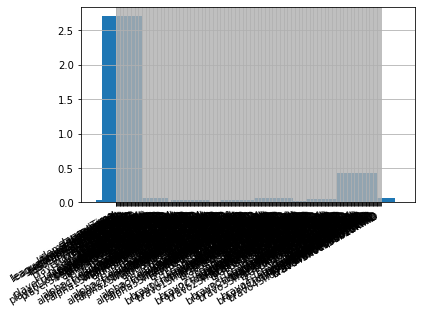

In [58]:
import matplotlib.pyplot as plt

importances = np.zeros(model.feature_importances_.size)

for model in models:
    importances += model.feature_importances_

fig, ax = plt.subplots()
plt.grid()
ax.bar(train_x.columns,importances)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

In [77]:
model.feature_importances_.nonzero()

(array([  0,   8,   9, 246, 267]),)

In [82]:
train_x.columns[267]


'bravo3Kill'